# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$



Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

$$
    \nabla_{w} Q(w) = \dfrac{2}{\ell} \left( X \right)^T \left( Xw - y \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

Вопрос к Филу: мы просто вычисляем лос по верхней формуле?

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

import numpy as np

from descents3 import get_descent
from linear_regression import LinearRegression

In [6]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [7]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [8]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'
print (max_iter + 1, len(regression.loss_history))

AssertionError: Loss history failed

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [3]:
data = pd.read_csv('autos.csv')

In [4]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [12]:
data.shape

(241190, 10)

In [13]:
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

[Text(0.5, 1.0, 'Распределение цены')]

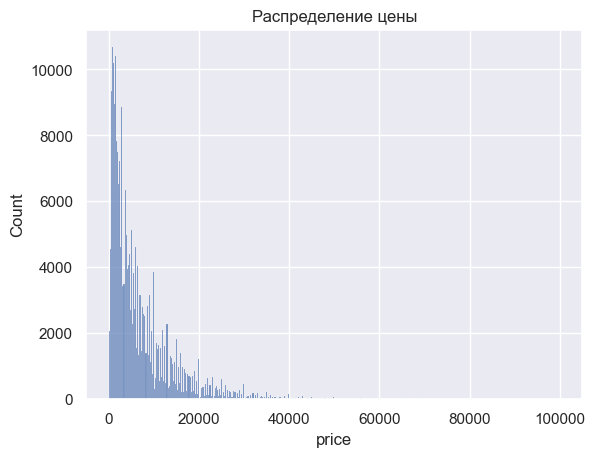

In [6]:
ax = sns.histplot(data['price'])
ax.set(title='Распределение цены')

NameError: name 'ax' is not defined

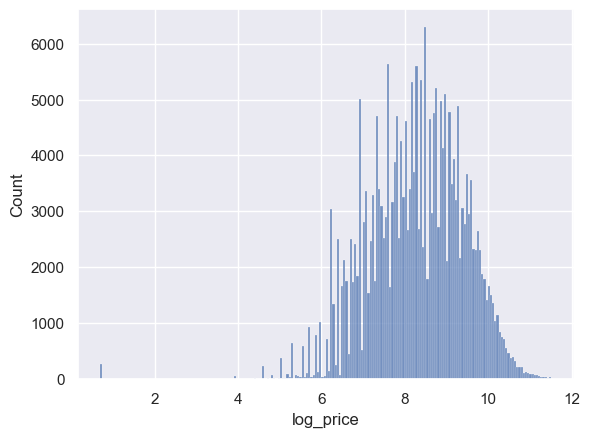

In [5]:
#замена целевой переменной на ее логарифм (после мы удалим столбец с прошлым таргетом)
data['log_price'] = np.log1p(data['price'].values)
sns.histplot(data['log_price'])
ax.set(title='Распределение логарифма цены')

<function matplotlib.pyplot.show(close=None, block=None)>

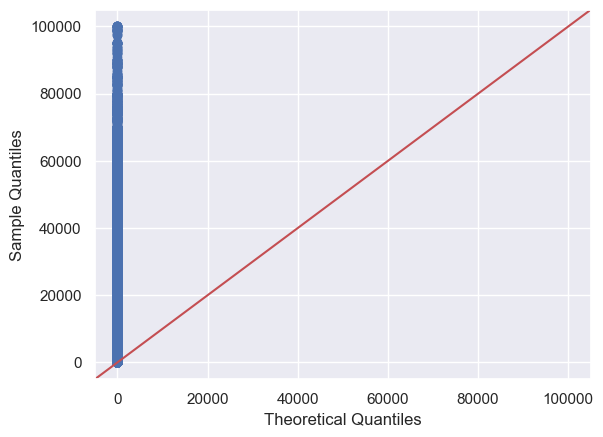

In [8]:
fig = sm.qqplot(data['price'],line = '45')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

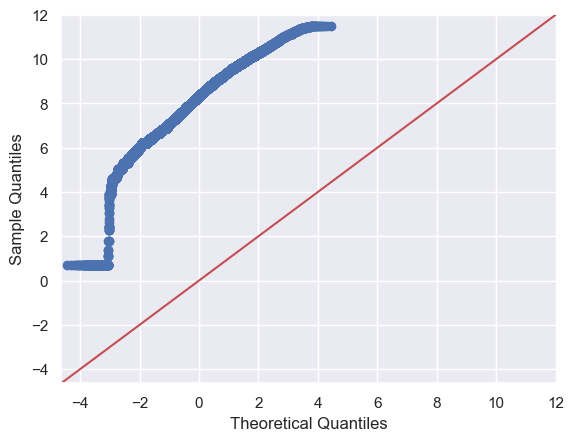

In [9]:
fig = sm.qqplot(data['log_price'],line = '45')
plt.show

Видим, что исходное распределение целевой переменной имеет экспоненциальную природу. Взяв логарифм, заметим, что теперь распределение похоже на нормальное. Имеет смысл работать с ним, чтобы смоделировать более сложную зависимость с помощью линейной модели.

<Axes: >

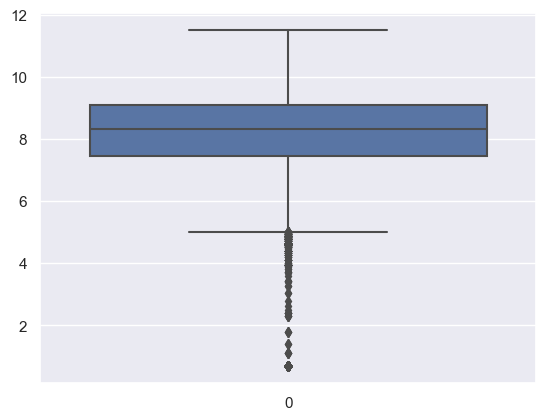

In [20]:
sns.boxplot(data['log_price'])

In [21]:
data_drop = data.loc[data['log_price'] > 5.1]
data_drop

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402
...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900,8.974745
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200,8.071219
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199,7.090077
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200,9.127067


In [22]:
data_drop.describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,240013.000000,240013.000000,240013.000000,240013.000000,240013.000000
mean,131.469337,123703.611888,144.403916,6921.075608,8.288069
std,60.630995,39840.987646,72.989756,8029.937169,1.104660
min,51.000000,5000.000000,1.000000,169.000000,5.135798
25%,90.000000,100000.000000,92.000000,1800.000000,7.496097
50%,120.000000,150000.000000,139.000000,4199.000000,8.342840
75%,160.000000,150000.000000,192.000000,8999.000000,9.104980
max,589.000000,150000.000000,600.000000,99999.000000,11.512925


<Axes: >

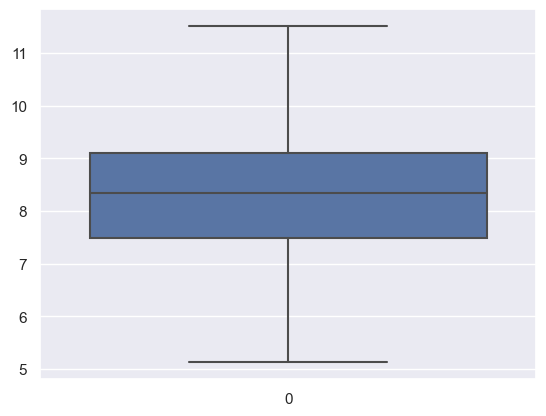

In [23]:
sns.boxplot(data_drop['log_price'])

<Axes: >

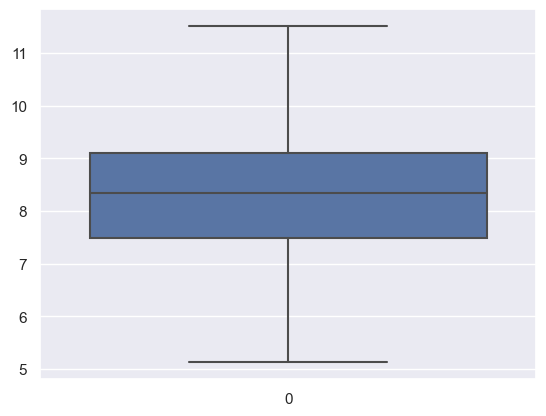

In [24]:
sns.boxplot(data_drop['log_price'])

/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_64983/2473759977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_drop['log_price'])


<Axes: xlabel='log_price', ylabel='Density'>

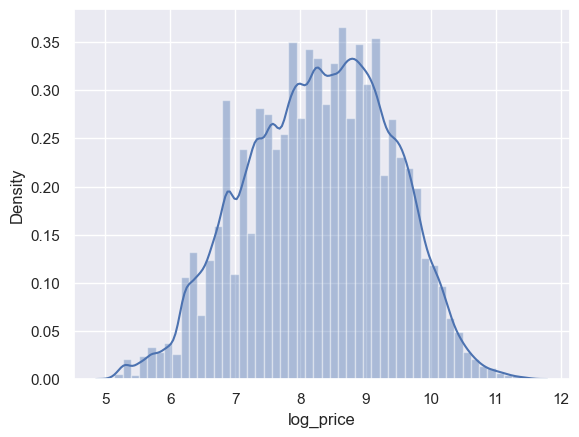

In [25]:
sns.distplot(data_drop['log_price'])

/var/folders/qg/bhrjqlw5373cm3pjz7y0yntc0000gn/T/ipykernel_64983/2317095200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_drop['price'])


<Axes: xlabel='price', ylabel='Density'>

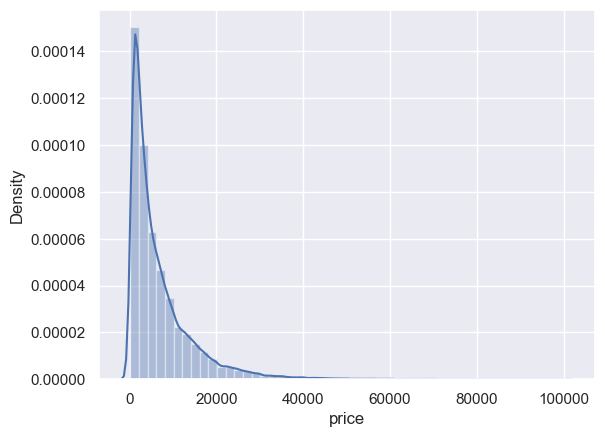

In [26]:
sns.distplot(data_drop['price'])

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;

In [27]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

Text(0.5, 1.0, 'dependence')

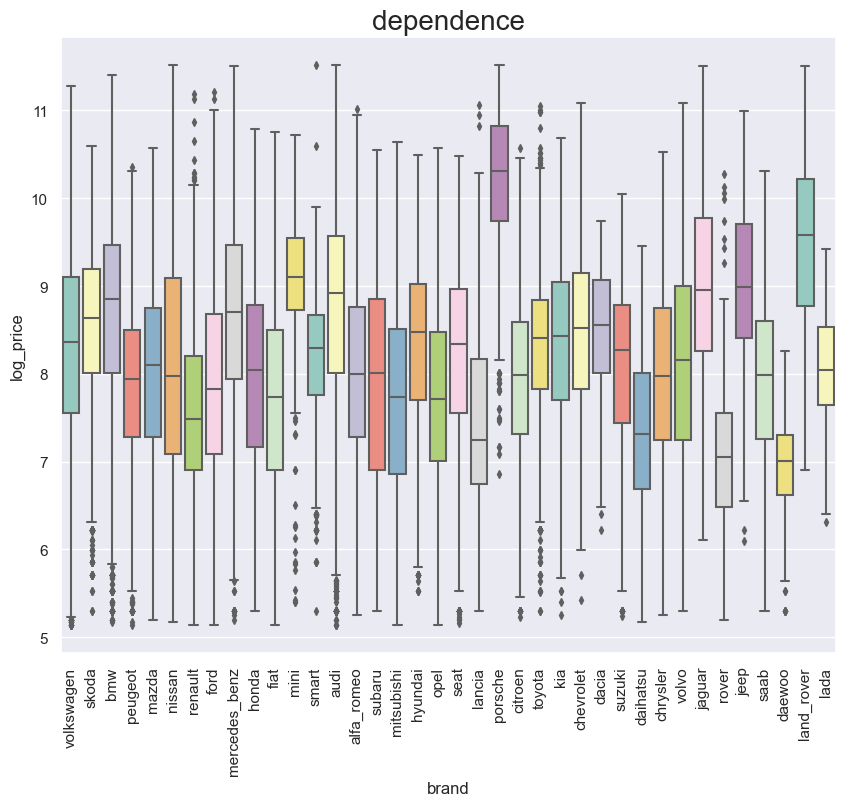

In [30]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = data_drop['brand'], y = data_drop['log_price'], palette="Set3", data = data_drop, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

Признак бренда - важный признак, его мы не хотим выбрасывать, цена выделяется больше всех у брендов: порш, ленд_ровер. Для того чтобы использовать его мы будем его ван хотить, была идея сократить 38 категорий на меньшее кол-во, но пока оставим 38. 

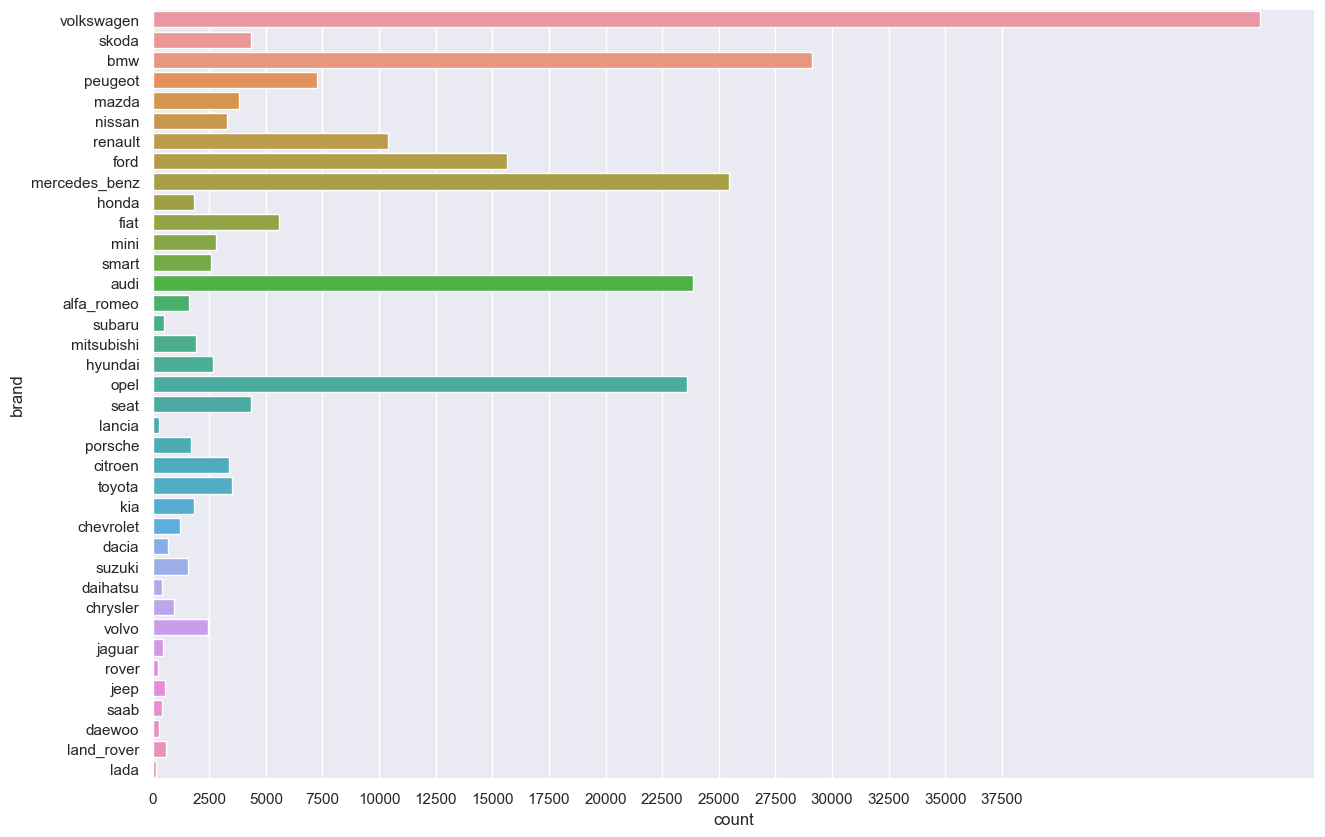

In [31]:
ax = sns.countplot(data=data_drop, y='brand')
ax.figure.set_size_inches((15, 10))
ax.set_xticks(np.arange(0, 40000, 2500));

In [32]:
data_drop.loc[(data_drop['log_price'] < 8) & (data_drop['brand'] =='porsche')]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
32875,porsche,andere,coupe,manuell,benzin,ja,125,150000,384,2000,7.601402
43820,porsche,andere,coupe,automatik,benzin,ja,163,150000,382,2700,7.901377
60828,porsche,andere,coupe,manuell,benzin,nein,163,150000,395,2455,7.806289
72800,porsche,911,coupe,manuell,benzin,nein,179,5000,440,2700,7.901377
92660,porsche,andere,coupe,manuell,benzin,nein,125,150000,421,1800,7.496097
93382,porsche,andere,cabrio,manuell,benzin,ja,125,80000,428,1300,7.170888
134815,porsche,andere,coupe,manuell,benzin,nein,125,100000,441,2800,7.937732
137511,porsche,andere,coupe,manuell,benzin,nein,125,80000,397,950,6.857514
146693,porsche,andere,cabrio,manuell,benzin,ja,125,100000,477,2500,7.824446
155374,porsche,andere,coupe,manuell,benzin,nein,163,150000,395,2455,7.806289


In [33]:
data_drop.loc[(data_drop['brand'] =='porsche') & (data_drop['kilometer'] >= 150000) & (data_drop['notRepairedDamage'] == 'ja') & (data_drop['vehicleType'] == 'coupe')]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
17252,porsche,911,coupe,manuell,benzin,ja,250,150000,307,15000,9.615872
32875,porsche,andere,coupe,manuell,benzin,ja,125,150000,384,2000,7.601402
34782,porsche,911,coupe,manuell,benzin,ja,286,150000,225,33500,10.419331
43820,porsche,andere,coupe,automatik,benzin,ja,163,150000,382,2700,7.901377
75400,porsche,911,coupe,automatik,benzin,ja,300,150000,214,8700,9.071193
86798,porsche,andere,coupe,manuell,benzin,ja,190,150000,359,2999,8.006368
130873,porsche,911,coupe,manuell,benzin,ja,300,150000,195,30000,10.308986
142926,porsche,andere,coupe,automatik,benzin,ja,320,150000,313,6999,8.853665
157577,porsche,911,coupe,automatik,benzin,ja,300,150000,200,10000,9.210440
160476,porsche,andere,coupe,manuell,benzin,ja,300,150000,417,7890,8.973478


In [34]:
data_drop2 = data_drop.drop([222159,195508])

In [35]:
index = data_drop2[(data_drop2['brand'] == 'mini') & (data_drop2['log_price'] < 7)].index
data_drop2.drop(index, inplace=True)

Text(0.5, 1.0, 'dependence')

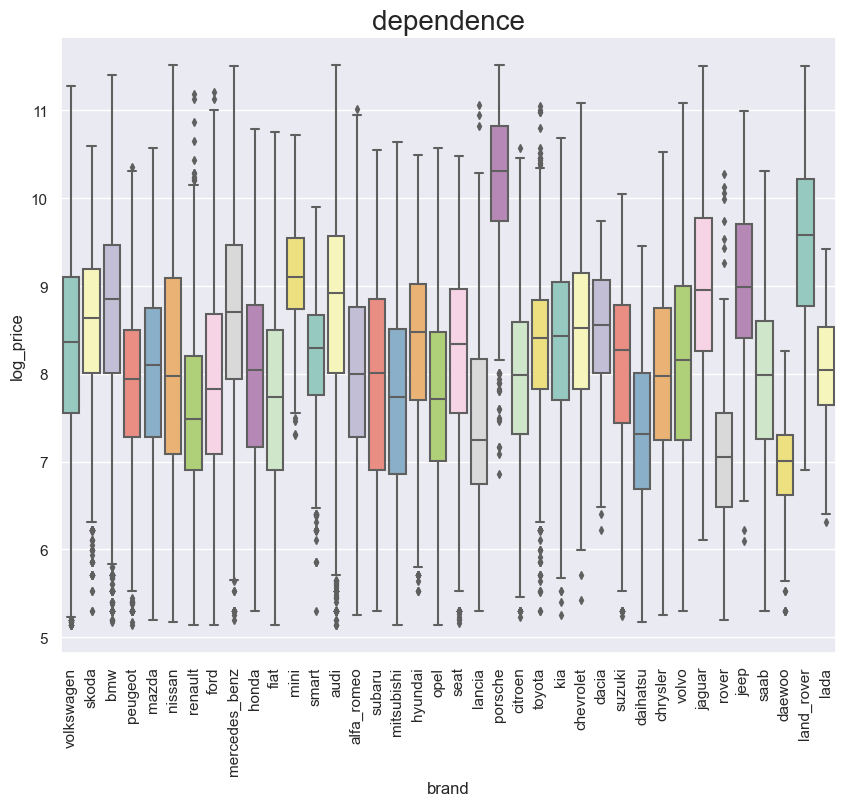

In [36]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = data_drop2['brand'], y = data_drop2['log_price'], palette="Set3", data = data_drop, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

In [37]:
data_drop2['brand'].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'honda', 'fiat', 'mini',
       'smart', 'audi', 'alfa_romeo', 'subaru', 'mitsubishi', 'hyundai',
       'opel', 'seat', 'lancia', 'porsche', 'citroen', 'toyota', 'kia',
       'chevrolet', 'dacia', 'suzuki', 'daihatsu', 'chrysler', 'volvo',
       'jaguar', 'rover', 'jeep', 'saab', 'daewoo', 'land_rover', 'lada'],
      dtype=object)

Text(0.5, 1.0, 'dependence mini')

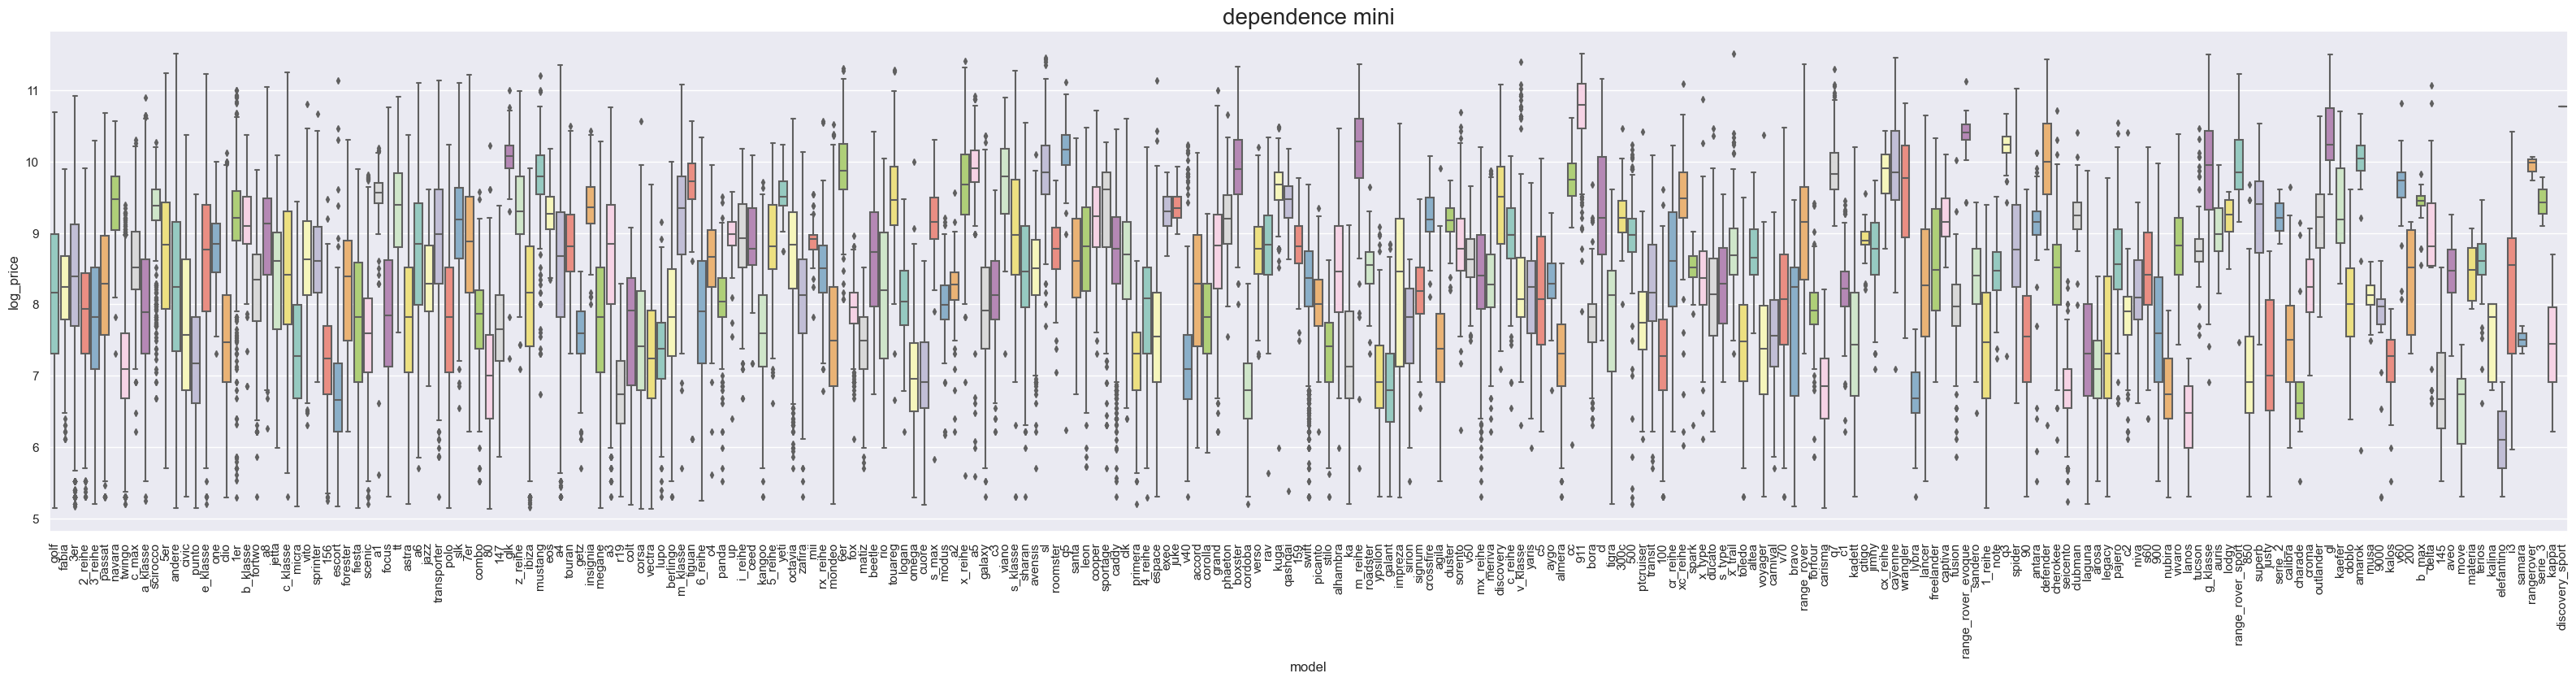

In [38]:
plt.rcParams['figure.figsize'] = 40, 8
sns.boxplot(x = data_drop2['model'], y = data_drop2['log_price'], palette="Set3", data = data_drop2, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence mini', fontsize=20)

In [39]:
data_mini = data_drop2.loc[(data_drop2['brand'] == 'mini')]
data_volkswagen = data_drop2.loc[(data_drop2['brand'] == 'volkswagen')]
data_bmw = data_drop2.loc[(data_drop2['brand'] == 'bmw')]
data_porsche = data_drop2.loc[(data_drop2['brand'] == 'porsche')]
data_peugeot = data_drop2.loc[(data_drop2['brand'] == 'peugeot')]
data_mazda = data_drop2.loc[(data_drop2['brand'] == 'mazda')]

Text(0.5, 1.0, 'dependence mini')

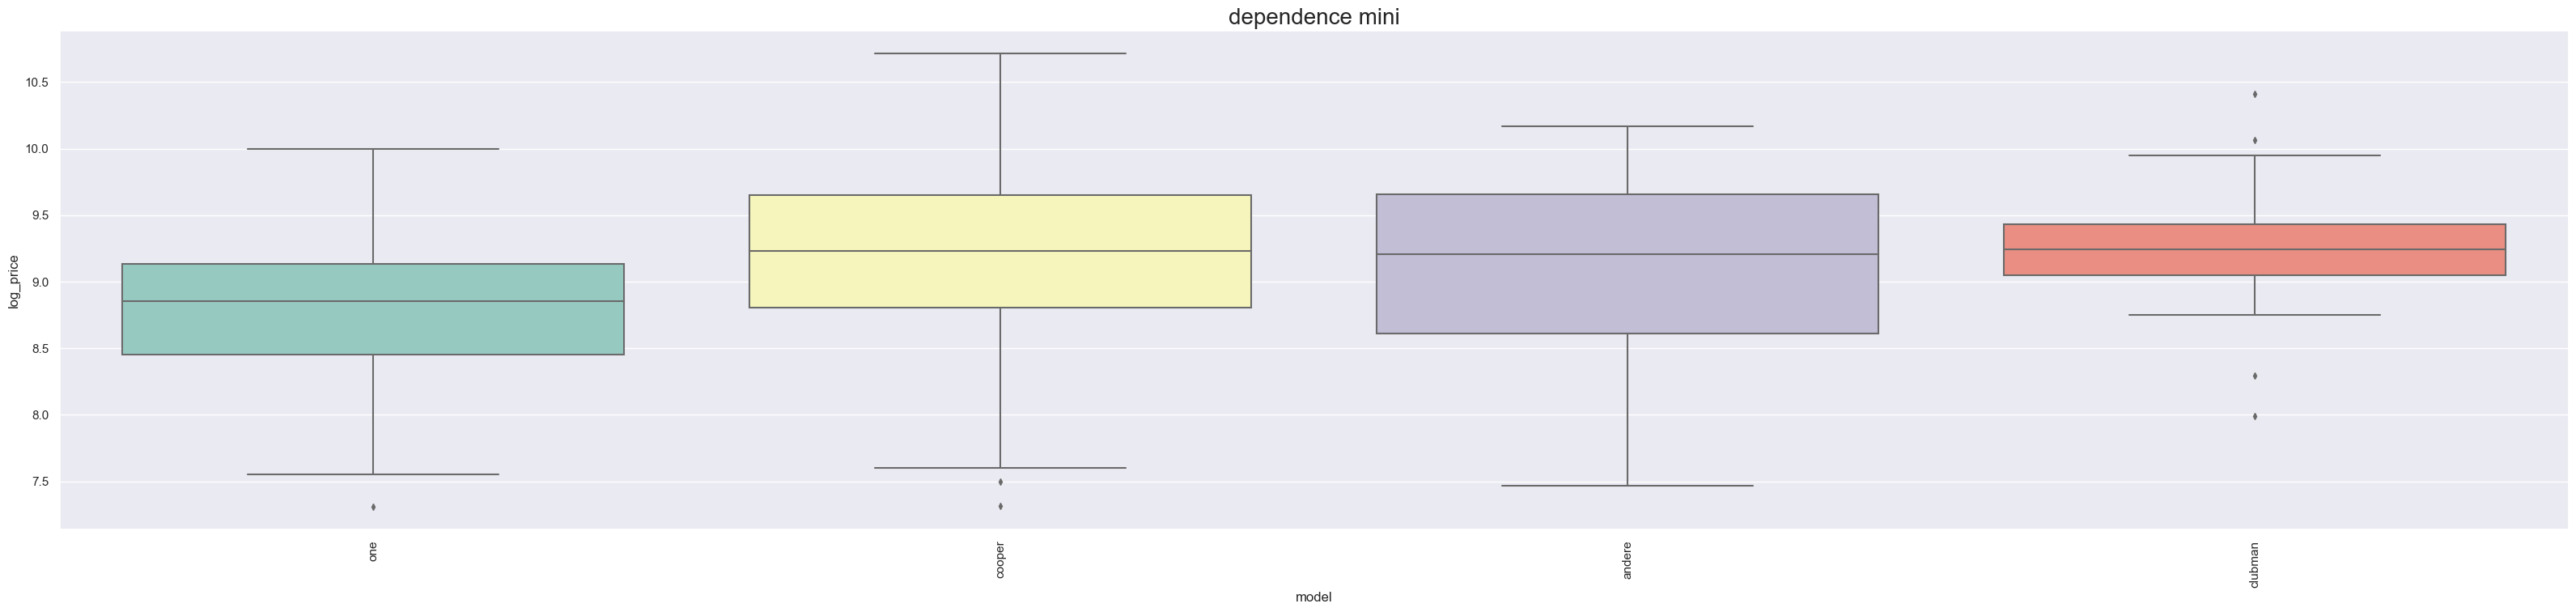

In [40]:
plt.rcParams['figure.figsize'] = 40, 8
sns.boxplot(x = data_mini['model'], y = data_mini['log_price'], palette="Set3", data = data_mini, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence mini', fontsize=20)

Text(0.5, 1.0, 'dependence porsche')

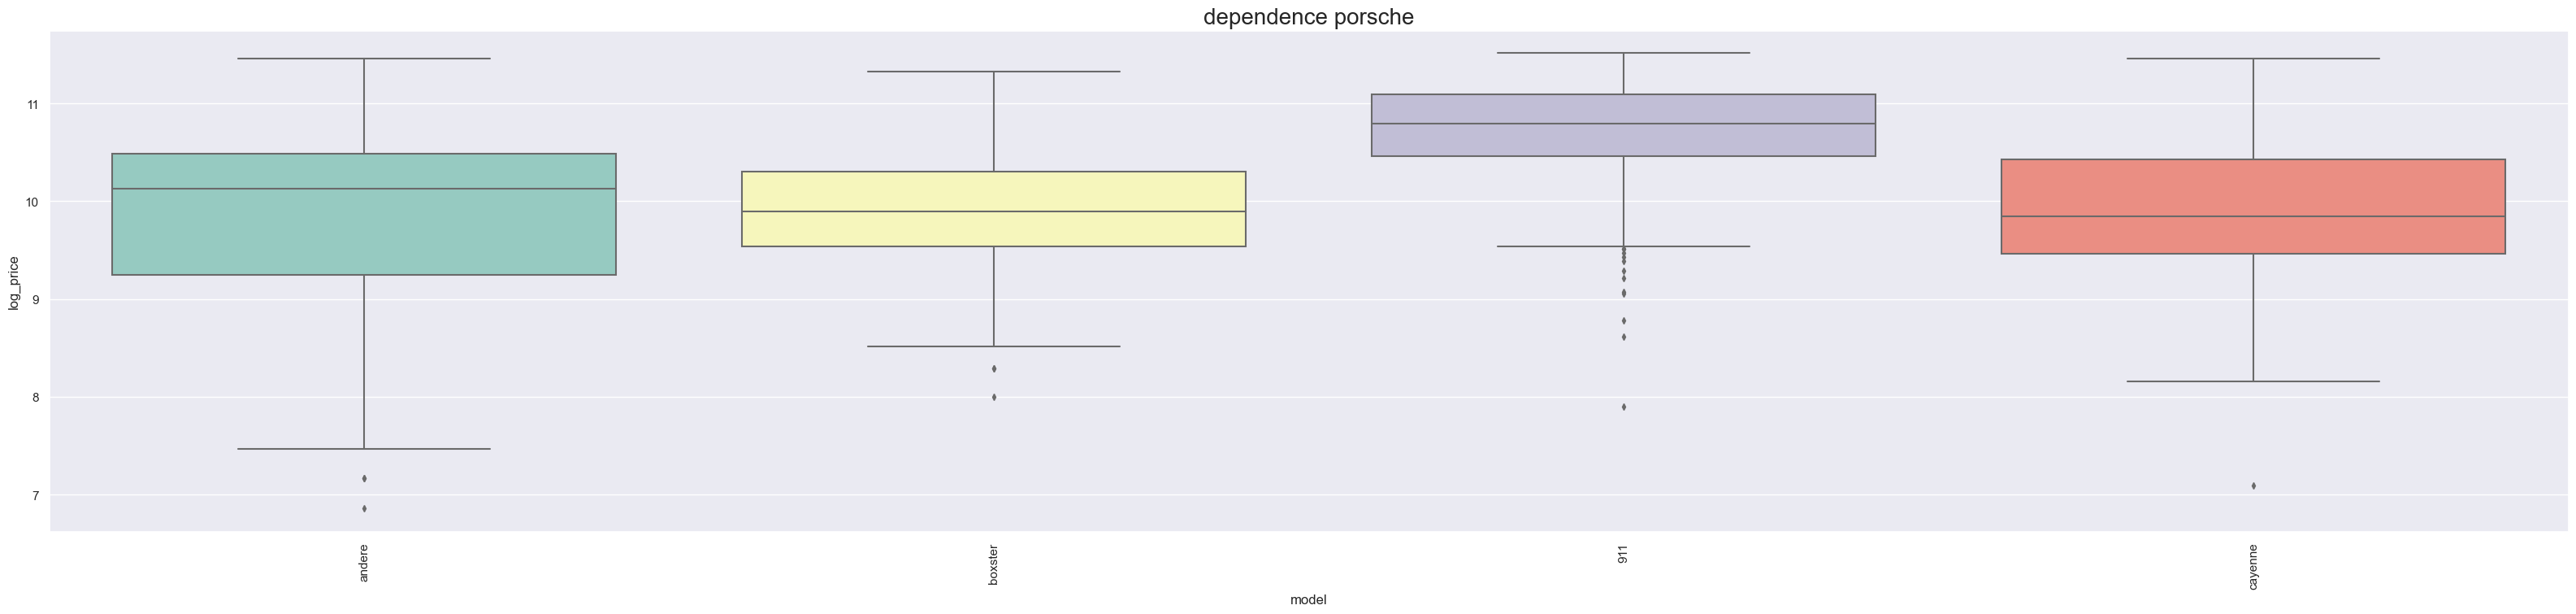

In [41]:
plt.rcParams['figure.figsize'] = 40, 8
sns.boxplot(x = data_porsche['model'], y = data_porsche['log_price'], palette="Set3", data = data_porsche, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence porsche', fontsize=20)

Text(0.5, 1.0, 'dependence volkswagen')

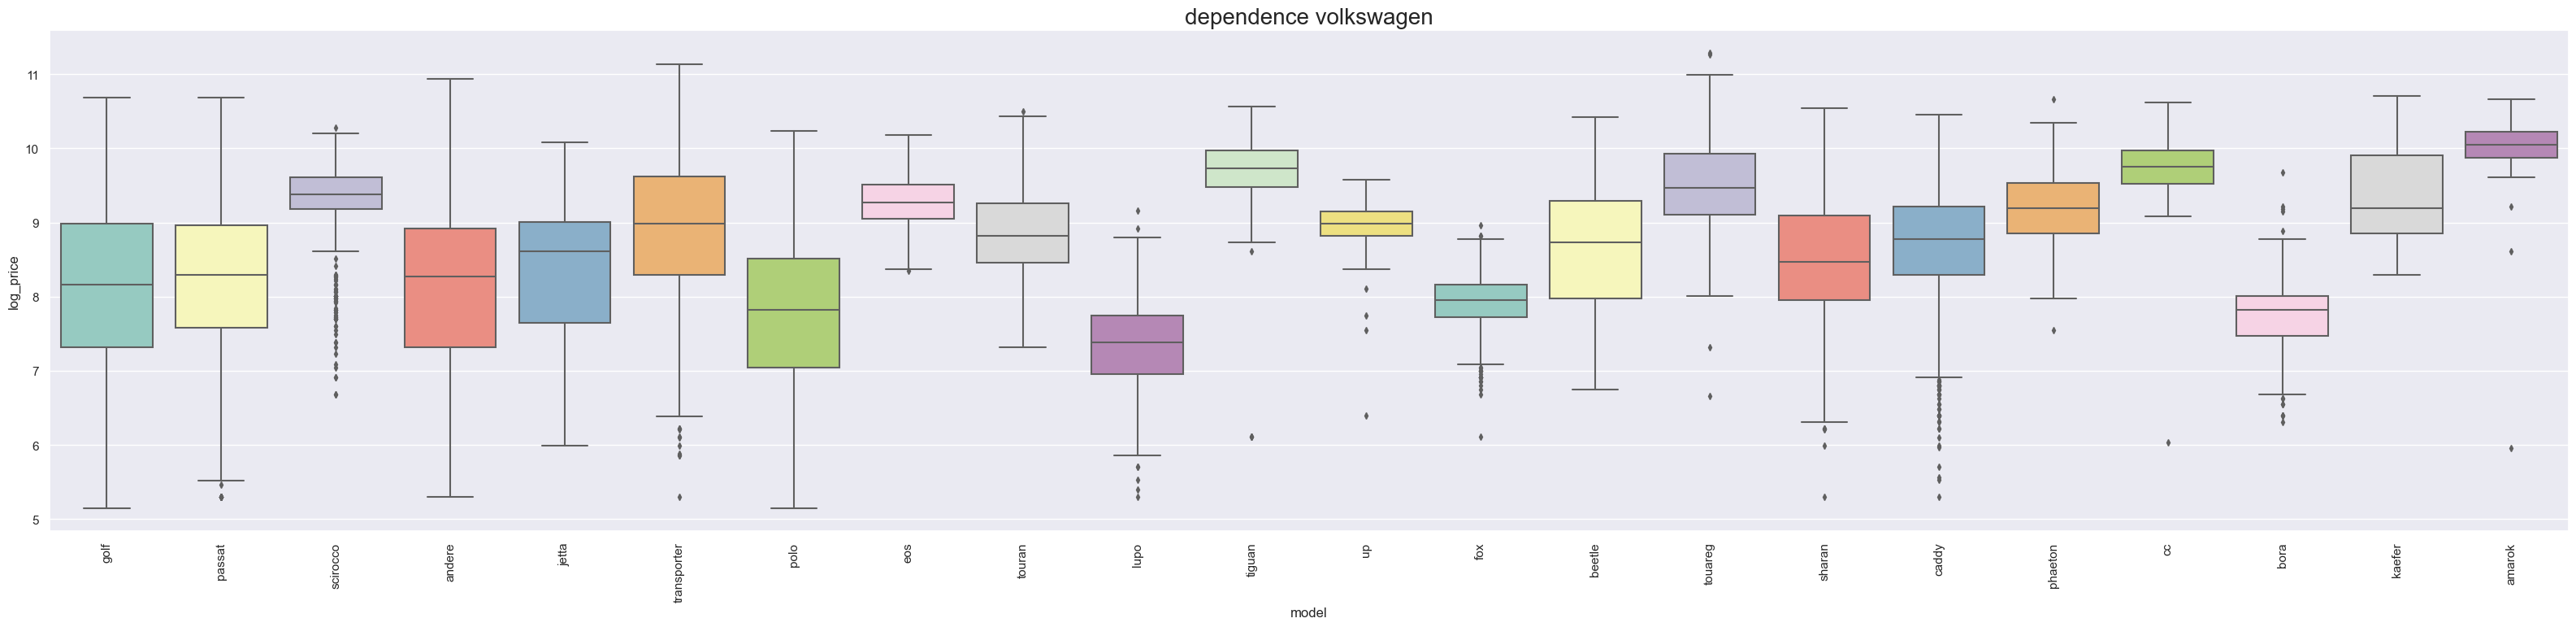

In [42]:
plt.rcParams['figure.figsize'] = 40, 8
sns.boxplot(x = data_volkswagen['model'], y = data_volkswagen['log_price'], palette="Set3", data = data_volkswagen, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence volkswagen', fontsize=20)

Text(0.5, 1.0, 'dependence')

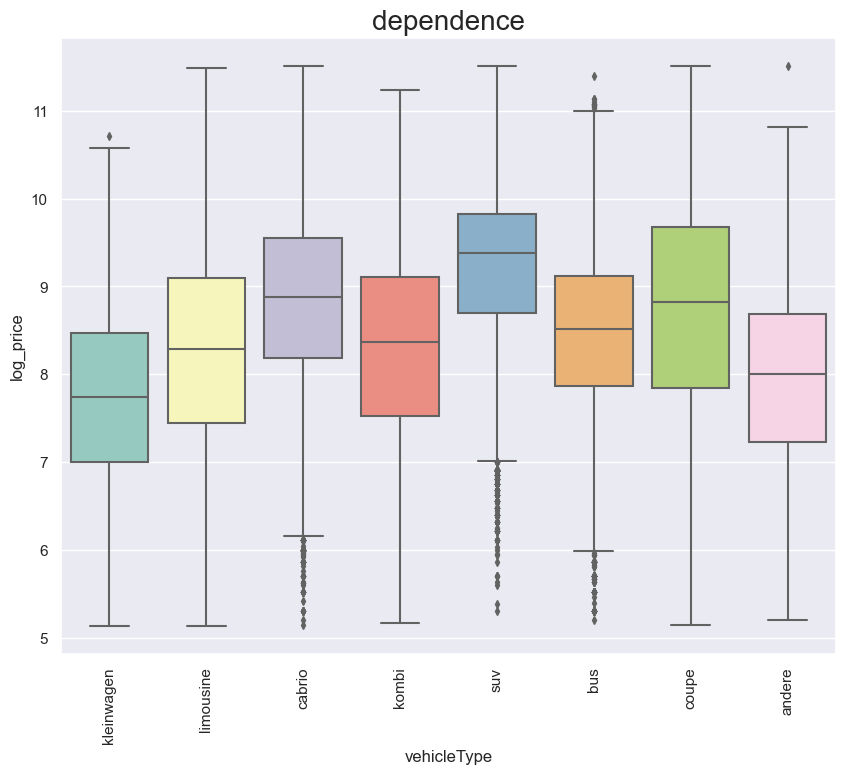

In [43]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = data_drop2['vehicleType'], y = data_drop2['log_price'], palette="Set3", data = data_drop, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

In [44]:
index = data_drop2[(data_drop2['vehicleType'] == 'andere') & (data_drop2['log_price'] > 11)].index
data_drop2.drop(index, inplace=True)

In [45]:
index2 = data_drop2[(data_drop2['vehicleType'] == 'suv') & (data_drop2['log_price'] < 7)].index
data_drop2.drop(index2, inplace=True)

In [46]:
index2 = data_drop2[(data_drop2['vehicleType'] == 'bus') & (data_drop2['log_price'] < 6)].index
data_drop2.drop(index2, inplace=True)

In [47]:
index2 = data_drop2[(data_drop2['vehicleType'] == 'cabrio') & (data_drop2['log_price'] < 6)].index
data_drop2.drop(index2, inplace=True)

Text(0.5, 1.0, 'dependence')

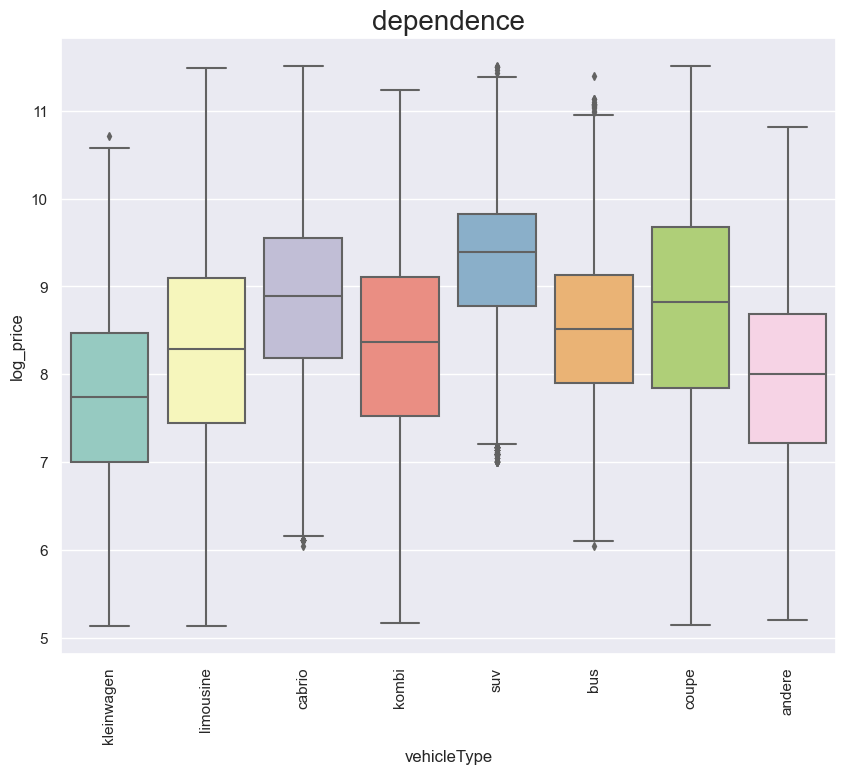

In [48]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = data_drop2['vehicleType'], y = data_drop2['log_price'], palette="Set3", data = data_drop2, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

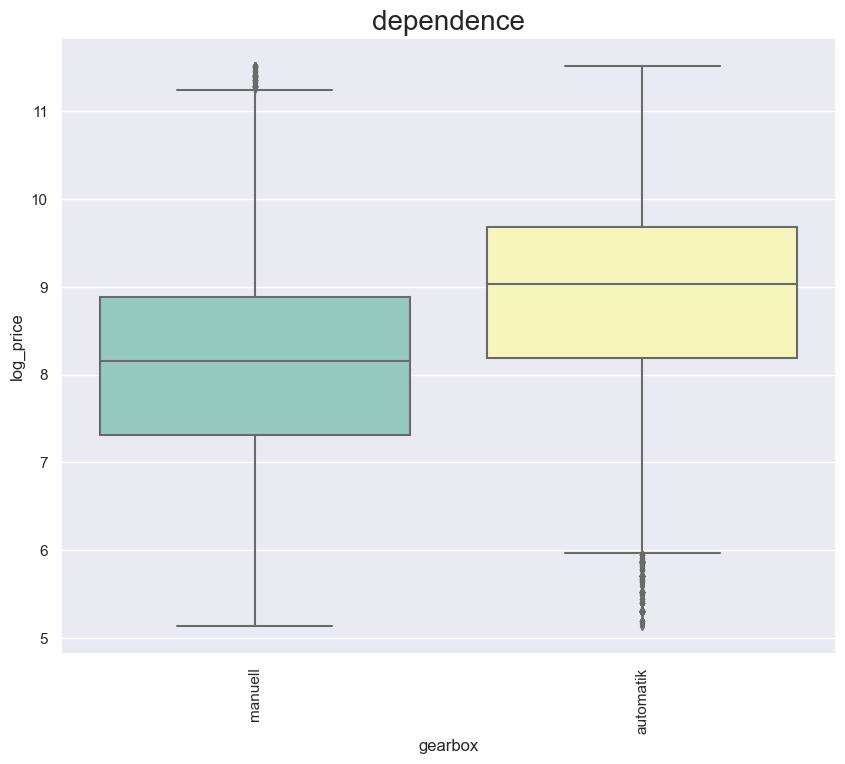

In [49]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = data_drop2['gearbox'], y = data_drop2['log_price'], palette="Set3", data = data_drop2, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

In [50]:
index2 = data_drop2[(data_drop2['gearbox'] == 'automatik') & (data_drop2['log_price'] < 6)].index
data_drop2.drop(index2, inplace=True)
index3 = data_drop2[(data_drop2['gearbox'] == 'manuell') & (data_drop2['log_price'] > 11.2)].index
data_drop2.drop(index3, inplace=True)

Text(0.5, 1.0, 'dependence')

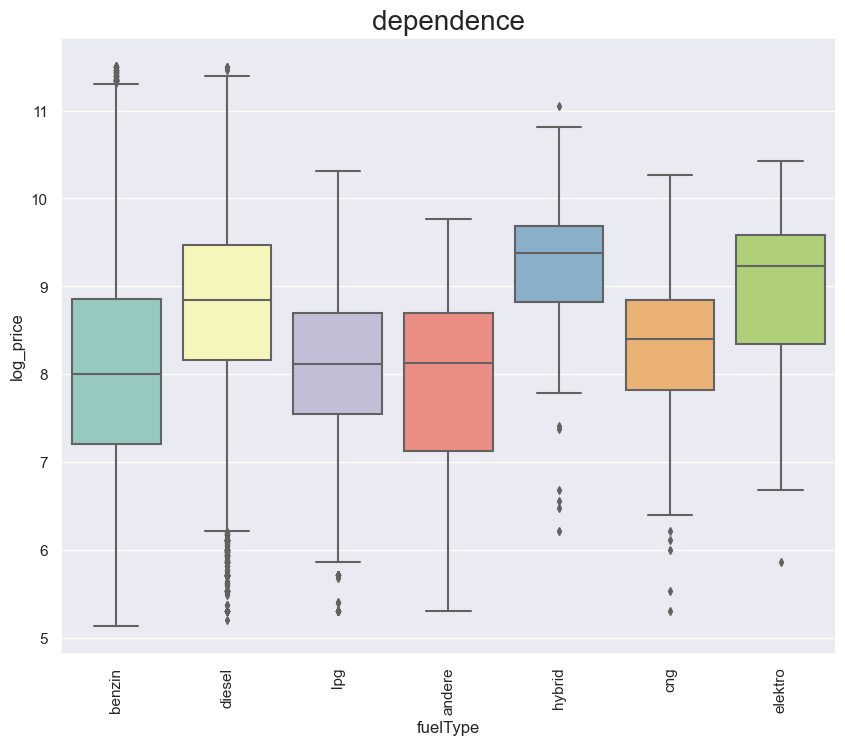

In [51]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = data_drop2['fuelType'], y = data_drop2['log_price'], palette="Set3", data = data_drop2, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

In [52]:
index2 = data_drop2[(data_drop2['fuelType'] == 'hybrid') & (data_drop2['log_price'] < 7.6)].index
data_drop2.drop(index2, inplace=True)
index3 = data_drop2[(data_drop2['fuelType'] == 'diesel') & (data_drop2['log_price'] < 6.2)].index
data_drop2.drop(index3, inplace=True)
index3 = data_drop2[(data_drop2['fuelType'] == 'cng') & (data_drop2['log_price'] < 6.5)].index
data_drop2.drop(index3, inplace=True)
index3 = data_drop2[(data_drop2['fuelType'] == 'elektro') & (data_drop2['log_price'] < 6)].index
data_drop2.drop(index3, inplace=True)
index3 = data_drop2[(data_drop2['fuelType'] == 'lpg') & (data_drop2['log_price'] < 5.8)].index
data_drop2.drop(index3, inplace=True)

Text(0.5, 1.0, 'dependence')

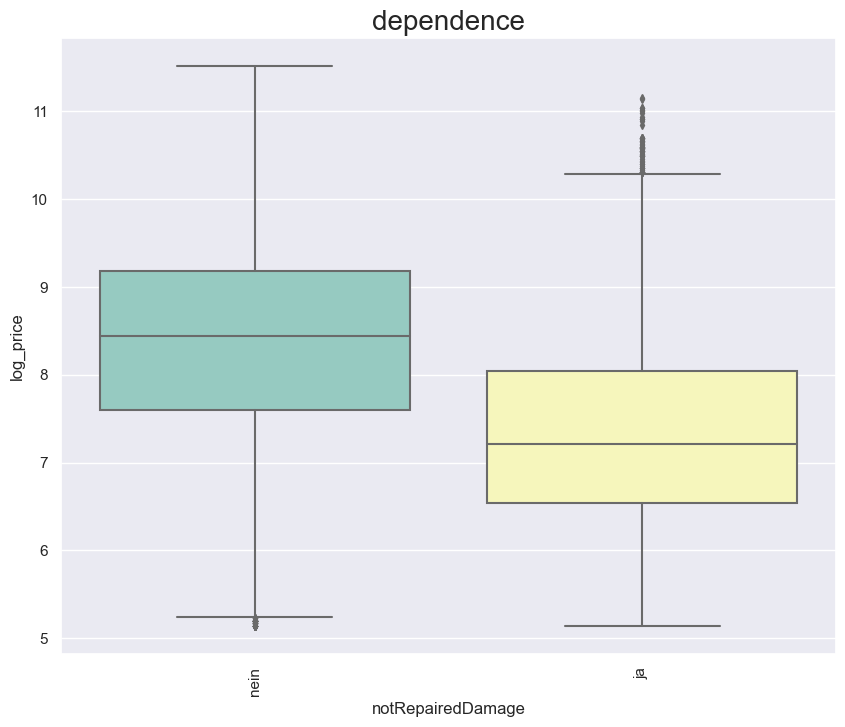

In [53]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(x = data_drop2['notRepairedDamage'], y = data_drop2['log_price'], palette="Set3", data = data_drop2, fliersize=4)

plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

In [54]:
index2 = data_drop2[(data_drop2['notRepairedDamage'] == 'ja') & (data_drop2['log_price'] > 10.3)].index
data_drop2.drop(index2, inplace=True)
index3 = data_drop2[(data_drop2['notRepairedDamage'] == 'nein') & (data_drop2['log_price'] < 5.2)].index
data_drop2.drop(index3, inplace=True)

**Автомобили с неисправностями стоят дешевле, чем без них.**

Text(0.5, 1.0, 'dependence')

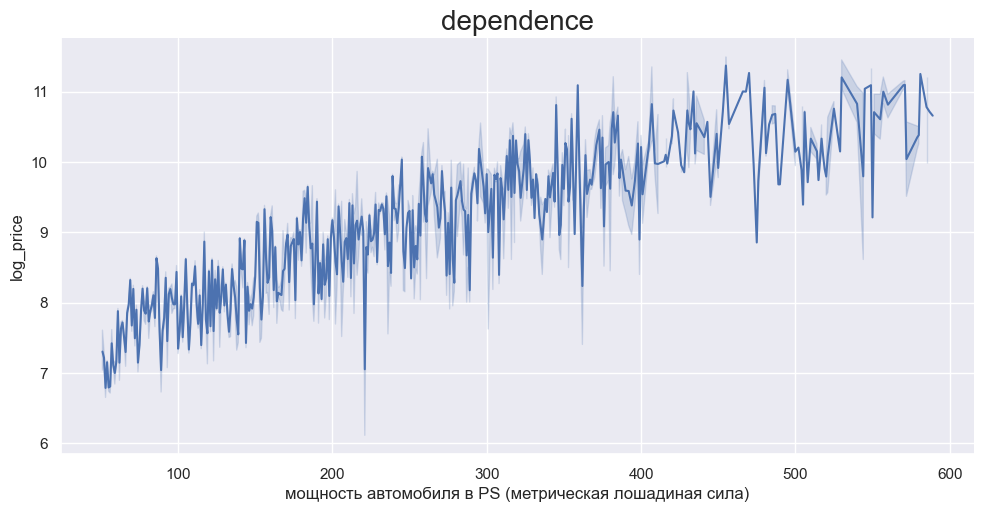

In [55]:
plt.rcParams['figure.figsize'] = 30, 8
sns.relplot(x = data_drop2['powerPS'], y = data_drop2['log_price'], aspect=2, kind='line')

plt.xlabel('мощность автомобиля в PS (метрическая лошадиная сила)')
plt.ylabel('log_price')
plt.title('dependence', fontsize=20)

**Чем больше мощность автомобиля, тем он дороже**

Text(0.5, 1.0, 'dependence')

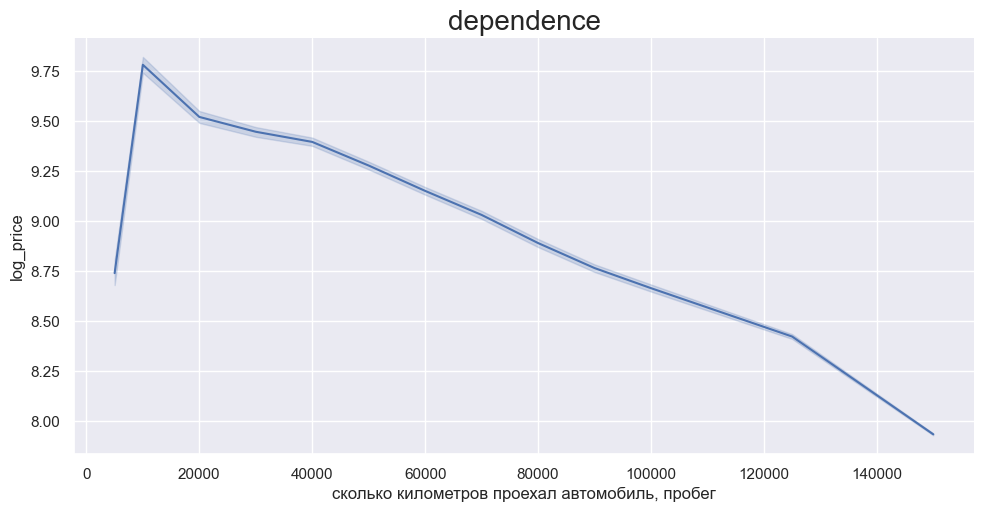

In [56]:
sns.relplot(x = data_drop2['kilometer'], y = data_drop2['log_price'], aspect=2, kind='line')

plt.xlabel('сколько километров проехал автомобиль, пробег')
plt.ylabel('log_price')
plt.title('dependence', fontsize=20)

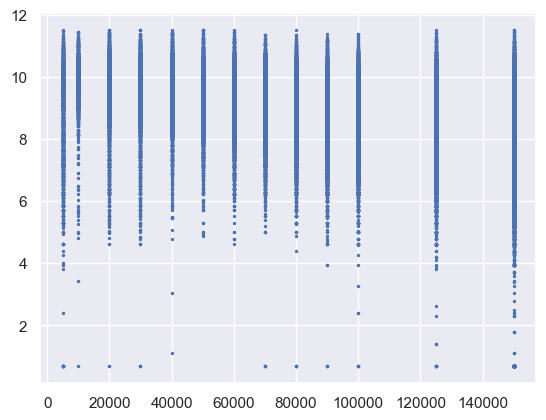

In [8]:
plt.scatter(x = data['kilometer'], y = data['log_price'], s=2)

**Чем больше пробег автомобиля, тем он дешевле**

Text(0.5, 1.0, 'dependence')

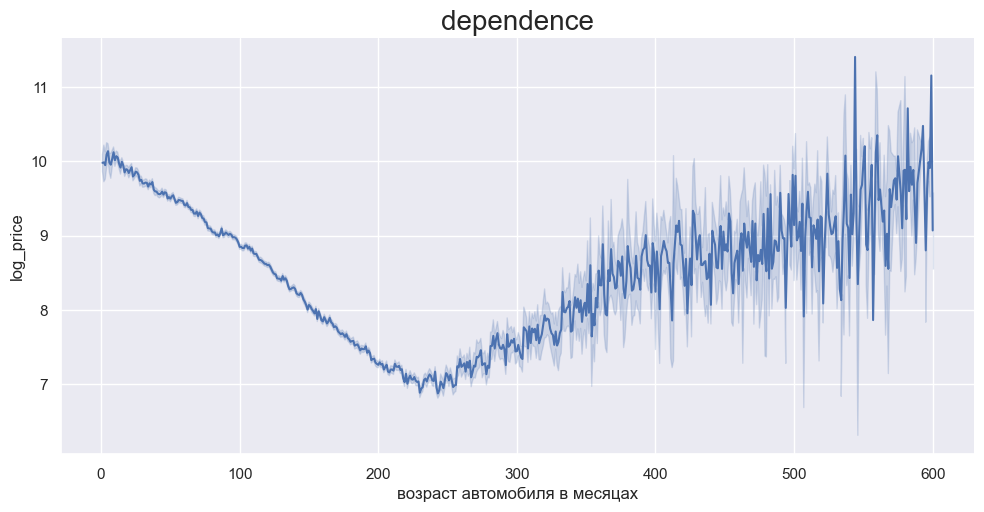

In [57]:
sns.relplot(x = data_drop2['autoAgeMonths'], y = data_drop2['log_price'], aspect=2, kind='line')

plt.xlabel('возраст автомобиля в месяцах')
plt.ylabel('log_price')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

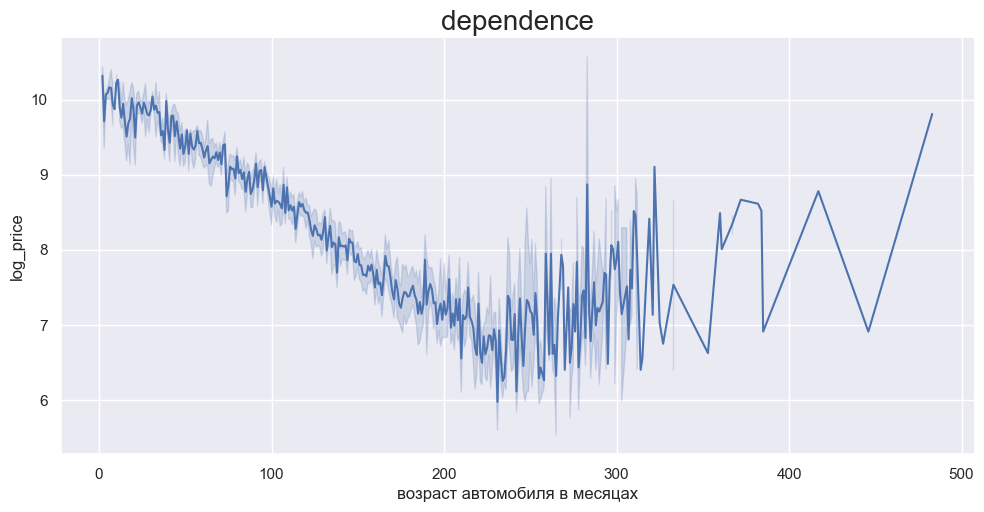

In [58]:
sns.relplot(x = data_mazda['autoAgeMonths'], y = data_mazda['log_price'], aspect=2, kind='line')

plt.xlabel('возраст автомобиля в месяцах')
plt.ylabel('log_price')
plt.title('dependence', fontsize=20)

**До 20 лет цена автомобиля падает (чем новее тем дороже), потом цена повышается, так как автомобиль считается винтажным**

закодировав все категориальные признаки с помощью OneHotEncoder. Численные признаки отмасштабируйте с помощью StandardScaler

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [59]:
data_drop2

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402
...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900,8.974745
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200,8.071219
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199,7.090077
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200,9.127067


In [60]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

#  YOUR CODE (EDA):

In [61]:
data_drop2['bias'] = 1
other += ['bias']

x = data_drop2[categorical + numeric + other]
y = data_drop2['log_price']


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [63]:
x

<238828x310 sparse matrix of type '<class 'numpy.float64'>'
	with 2388280 stored elements in Compressed Sparse Row format>

In [64]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [65]:
y_train

array([9.43356392, 8.36660283, 6.68586095, ..., 6.36475076, 8.11701409,
       7.5963923 ])

In [66]:
X_train.shape[1]

310

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение.. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [67]:
# YOUR CODE:
from descents3 import get_descent
from linear_regression import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score

methods = ['full', 'stochastic', 'momentum', 'adam']
dimension = X_train.shape[1] #кол-во признаков
lambdas_noreg = {}
lambdas_reg = {}

def find_lambda(method, regularized=False):
    
    best_lambda, best_model, best_mse = None, None, np.inf
    #logspace - возвращайте числа, равномерно распределенные по логарифмической шкале (старт/стоп/кол-во элементов)
    for param in np.logspace(-5, 1, 7):
        
        model = LinearRegression(descent_config = {'descent_name': method, 'kwargs': {'dimension': dimension, 'lambda_': param}, 'regularized':regularized})
        
        model.fit(X_train, y_train)
        mse_val = model.calc_loss(X_val, y_val)
        if mse_val < best_mse:
            best_lambda = param
            best_model = model
            best_mse = mse_val
    print(method)
    print('lambda', best_lambda)
    
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)
    print('train mse ', mean_squared_error(train_pred, y_train))
    print('test mse ', mean_squared_error(test_pred, y_test))
    
    print('train R2', r2_score(train_pred, y_train))
    print('test R2', r2_score(test_pred, y_test))

    if regularized:
        lambdas_reg[method] = best_lambda
    else:
        lambdas_noreg[method] = best_lambda

for method in methods:
    find_lambda(method)

/Users/mac/Desktop/ml/descents3.py:83: RuntimeWarning: overflow encountered in matmul
  return ((y - pred_y).T @ (y - pred_y))/l


full
lambda 1.0
train mse  0.3339903366332978
test mse  0.3437072045131098
train R2 0.6562913146067528
test R2 0.6455349781483153


/Users/mac/Desktop/ml/descents3.py:83: RuntimeWarning: overflow encountered in matmul
  return ((y - pred_y).T @ (y - pred_y))/l


stochastic
lambda 0.1
train mse  0.6642768954765534
test mse  0.6743730117876308
train R2 0.39704058285295285
test R2 0.38739316648211564


/Users/mac/Desktop/ml/descents3.py:83: RuntimeWarning: overflow encountered in matmul
  return ((y - pred_y).T @ (y - pred_y))/l


momentum
lambda 1.0
train mse  0.27382088520499376
test mse  0.27949942966791147
train R2 0.7041357036733139
test R2 0.6978410822137924
adam
lambda 1.0
train mse  0.24603936919897942
test mse  0.2513843744440777
train R2 0.7404736561088492
test R2 0.7348761219378932


In [68]:
from tqdm import tqdm

def fit_with_config(descent_config):
    regression = LinearRegression(
        descent_config=descent_config
    )
    
    regression.fit(X_train, y_train)
    return regression
    
    
def calc_loss_with_config(descent_config):
    regression = fit_with_config(descent_config)
    return regression.calc_loss(X_val, y_val)

def calc_descent_stats():
    descent_stats = pd.DataFrame(index=['full', 'stochastic', 'momentum', 'adam'], columns=['best_lambda', 'best_val_loss', 'loss_history', 'num_iters', 'best_train_loss', 'best_test_loss', 'r2_train_score', 'r2_test_score'])

    for descent_name in tqdm(descent_stats.index):

        lambdas = np.logspace(-5, 1, 7)
        losses = []
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
            }
        }
        
        for lambda_ in lambdas:
            descent_config['kwargs']['lambda_'] = lambda_
            losses += [calc_loss_with_config(descent_config)]

        descent_stats.loc[descent_name, 'best_lambda'] = lambdas[np.argmin(losses)]
        descent_stats.loc[descent_name, 'best_val_loss'] = np.min(losses)
        
        descent_config['kwargs']['lambda_'] = descent_stats.loc[descent_name, 'best_lambda']
        regression = fit_with_config(descent_config)

        descent_stats.loc[descent_name, 'loss_history'] = regression.loss_history
        descent_stats.loc[descent_name, 'num_iters'] = len(regression.loss_history) - 1
        descent_stats.loc[descent_name, 'best_train_loss'] = regression.calc_loss(X_train, y_train)
        descent_stats.loc[descent_name, 'best_test_loss'] = regression.calc_loss(X_test, y_test)
        descent_stats.loc[descent_name, 'r2_train_score'] = r2_score(y_train, regression.predict(X_train))
        descent_stats.loc[descent_name, 'r2_test_score'] = r2_score(y_test, regression.predict(X_test))

    return descent_stats

descent_stats = calc_descent_stats()
descent_stats = descent_stats.reset_index().rename(columns={'index': 'method'})

  0%|          | 0/4 [00:00<?, ?it/s]/Users/mac/Desktop/ml/descents3.py:83: RuntimeWarning: overflow encountered in matmul
  return ((y - pred_y).T @ (y - pred_y))/l
 25%|██▌       | 1/4 [00:10<00:32, 10.72s/it]/Users/mac/Desktop/ml/descents3.py:83: RuntimeWarning: overflow encountered in matmul
  return ((y - pred_y).T @ (y - pred_y))/l
 50%|█████     | 2/4 [00:18<00:17,  8.75s/it]/Users/mac/Desktop/ml/descents3.py:83: RuntimeWarning: overflow encountered in matmul
  return ((y - pred_y).T @ (y - pred_y))/l
100%|██████████| 4/4 [00:58<00:00, 14.74s/it]


In [69]:
descent_stats

,method,best_lambda,best_val_loss,loss_history,num_iters,best_train_loss,best_test_loss,r2_train_score,r2_test_score
0,full,1.0,0.337938,"[429.7869678021505, 3545.652428686658, 19848.0...",42,0.337781,0.343916,0.717568,0.712469
1,stochastic,0.1,0.531704,"[5.091629576260904, 3.2532581162130794, 2.2322...",42,0.592766,0.607546,0.504365,0.49206
2,momentum,1.0,0.267096,"[336.4958705470041, 1021.3975191736914, 925.19...",120,0.267357,0.274913,0.776452,0.770158
3,adam,1.0,0.244933,"[1.861493771345404, 6.805253177729482, 12.4446...",209,0.246791,0.252331,0.793648,0.789038


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

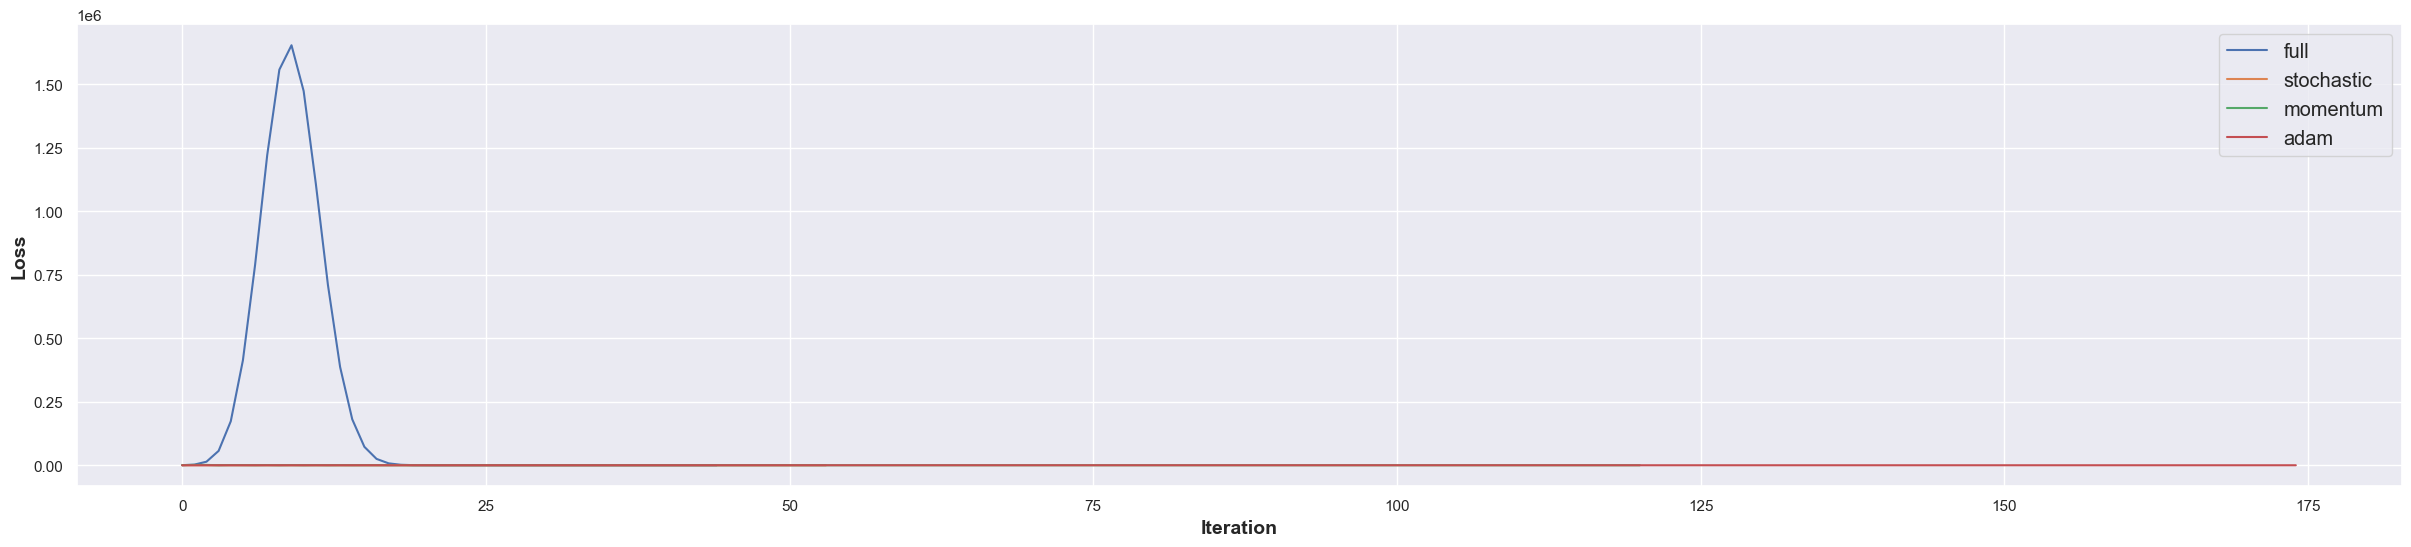

In [74]:
# YOUR CODE:
fig = plt.figure(figsize=(30, 6))

for method in methods:
    model = LinearRegression(descent_config={'descent_name': method, 'kwargs': {'dimension': dimension, 'lambda_': lambdas_noreg[method],}})      
    model.fit(X_train, y_train)
    plt.plot(model.loss_history, label=method)
    plt.ylabel('Loss', fontsize=14, weight='bold')
    plt.xlabel('Iteration', fontsize=14, weight='bold')
    
plt.legend(fontsize='large')

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [71]:
# YOUR CODE:
from time import time

def calc_stats_for_batch(batch_size):
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'lambda_': 0.1,
            'dimension': X_train.shape[1],
            'batch_size': batch_size
        }
    }
    
    k = 10
    durations_def = 0
    iterations_def = 0
    
    for i in range(k):
        regression = LinearRegression(
            descent_config=descent_config,
        )
        
        t_start = time()
        regression.fit(X_train, y_train)
        t_end = time()
        duration = t_end - t_start
        
        durations_def += duration
        iterations_def += len(regression.loss_history) - 1
    
    return durations_def, iterations_def

batch_sizes = np.arange(5, 500, 10)
durations = [] #время в секундах до сходимости
iterations = [] #количество итераций до сходимости

for batch_size in tqdm(batch_sizes):
    durations_def, iterations_def = calc_stats_for_batch(batch_size)
    durations.append(durations_def)
    iterations.append(iterations_def)

100%|██████████| 50/50 [02:49<00:00,  3.39s/it]


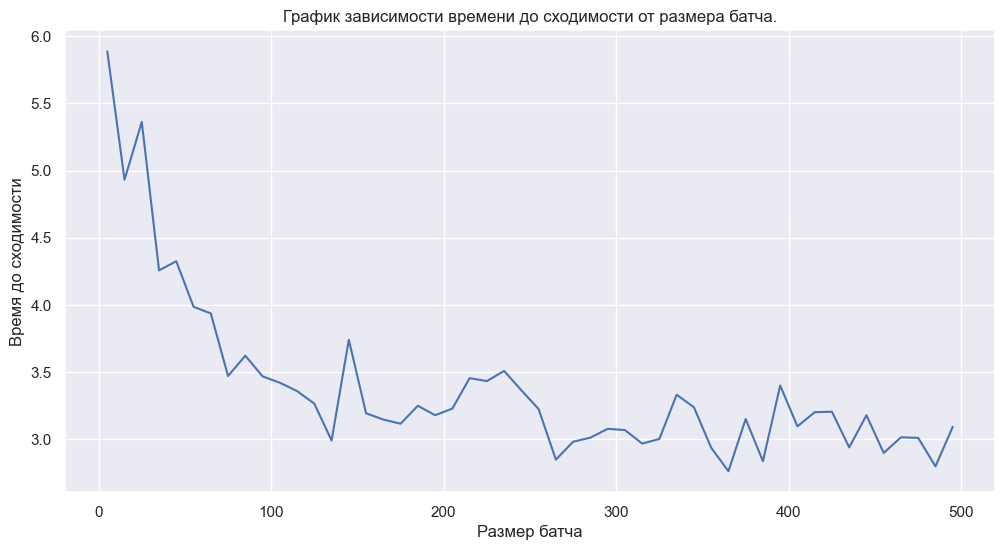

In [72]:
ax = sns.lineplot(x=batch_sizes, y=durations);

ax.set(title='График зависимости времени до сходимости от размера батча.')
ax.set(xlabel='Размер батча', ylabel='Время до сходимости');
ax.figure.set_size_inches((12, 6))

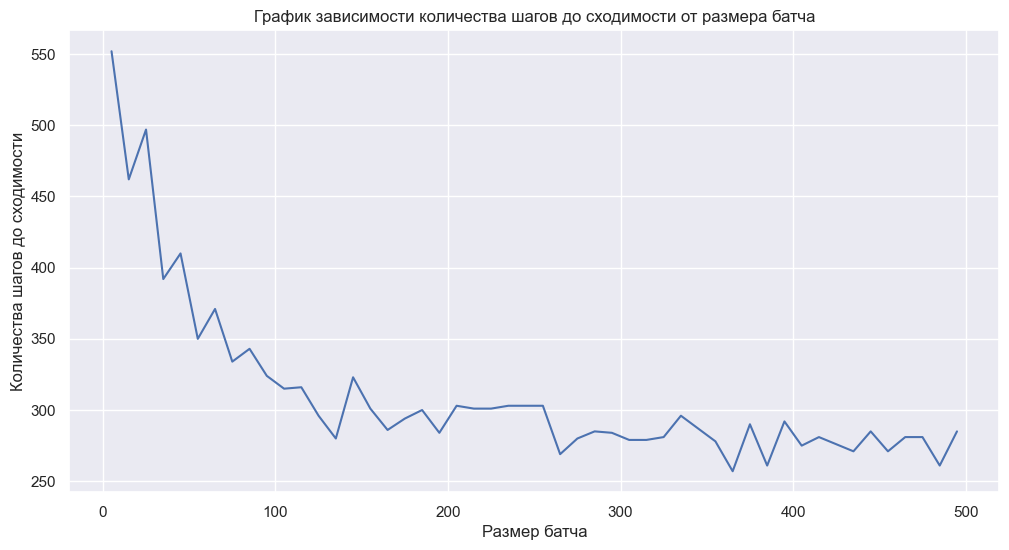

In [75]:
ax = sns.lineplot(x=batch_sizes, y=iterations);

ax.set(title='График зависимости количества шагов до сходимости от размера батча')
ax.set(xlabel='Размер батча', ylabel='Количества шагов до сходимости');
ax.figure.set_size_inches((12, 6))

Очев увеличивая размера батча, мы будем быстрее сходиться в плане количества итераций, потому что будем двигаться почти по направлению антиградиента.
При небольших размерах батча, мы почти хаотично двигаемся и долго сходимся, однако время будет убывать при увеличении размера, в какой-то момент мы достигнем минимума и потеряем фишку SGD и в пределе получим время работы Full GD.